### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


We import TensorFlow for deep learning, Matplotlib and Seaborn for plotting graphs, and other essentials for building and training the model.

In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

# Download dataset
api.dataset_download_files('shahriar26s/malaria-detection', path='.', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/shahriar26s/malaria-detection


### Prepare the Data

In [6]:
# Normalize the images (rescale pixel values to [0,1])
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the images
train_data = train_datagen.flow_from_directory('Malaria Dataset/train', target_size=(224,224), batch_size=32, class_mode='binary')
valid_data = valid_datagen.flow_from_directory('Malaria Dataset/valid', target_size=(224,224), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory('Malaria Dataset/test', target_size=(224,224), batch_size=32, class_mode='binary')


Found 13152 images belonging to 2 classes.
Found 1253 images belonging to 2 classes.
Found 626 images belonging to 2 classes.


ImageDataGenerator rescales pixel values from 0–255 to 0–1 (important for faster training).

flow_from_directory automatically labels images based on folder names.

### Build a CNN Model

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),    # helps prevent overfitting
    Dense(1, activation='sigmoid') # Binary output: infected or uninfected
])


Conv2D: Extracts features from the image.

MaxPooling2D: Downsamples the feature maps.

Flatten: Converts the 2D data into 1D.

Dense: Fully connected layers for final prediction.

Dropout: Randomly ignores 50% neurons to prevent overfitting.

Sigmoid Activation: Because this is a binary classification (infected/uninfected).

### Compile the Model

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Adam: Adaptive optimizer (smart gradient descent).

Binary Crossentropy: Ideal loss function for binary classification.

Accuracy: We want to monitor how well it predicts.

### Add Early Stopping

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)


If the model's validation loss doesn’t improve for 3 epochs, it stops automatically.

Saves time and avoids overfitting.

### Train the Model

In [10]:
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=15,
    callbacks=[early_stop]
)


Epoch 1/15
411/411 [==============================] - 547s 1s/step - loss: 0.6852 - accuracy: 0.5654 - val_loss: 0.6516 - val_accuracy: 0.6472
Epoch 2/15
411/411 [==============================] - 496s 1s/step - loss: 0.6481 - accuracy: 0.6219 - val_loss: 0.5891 - val_accuracy: 0.6840
Epoch 3/15
411/411 [==============================] - 492s 1s/step - loss: 0.4950 - accuracy: 0.7658 - val_loss: 0.3038 - val_accuracy: 0.8819
Epoch 4/15
411/411 [==============================] - 615s 1s/step - loss: 0.2680 - accuracy: 0.9015 - val_loss: 0.2415 - val_accuracy: 0.9042
Epoch 5/15
411/411 [==============================] - 724s 2s/step - loss: 0.1940 - accuracy: 0.9319 - val_loss: 0.1906 - val_accuracy: 0.9330
Epoch 6/15
411/411 [==============================] - 612s 1s/step - loss: 0.1564 - accuracy: 0.9472 - val_loss: 0.2270 - val_accuracy: 0.9306
Epoch 7/15
411/411 [==============================] - 485s 1s/step - loss: 0.1123 - accuracy: 0.9632 - val_loss: 0.2839 - val_accuracy: 0.9298

15 epochs should be good, but early stopping might stop it earlier if no improvement.

It trains on train_data and checks performance on valid_data every epoch.

### Plot Accuracy and Loss Curves

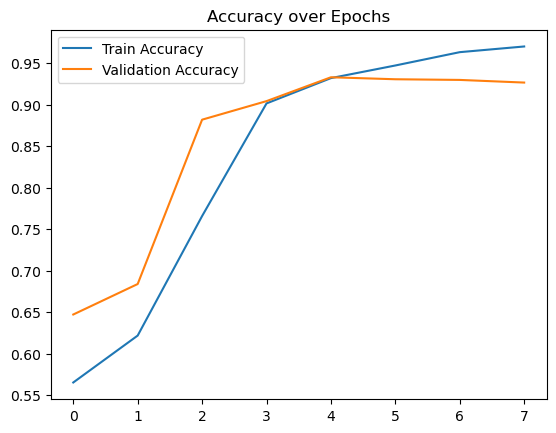

In [11]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()

Helps you visually see if the model is learning properly (and not overfitting).

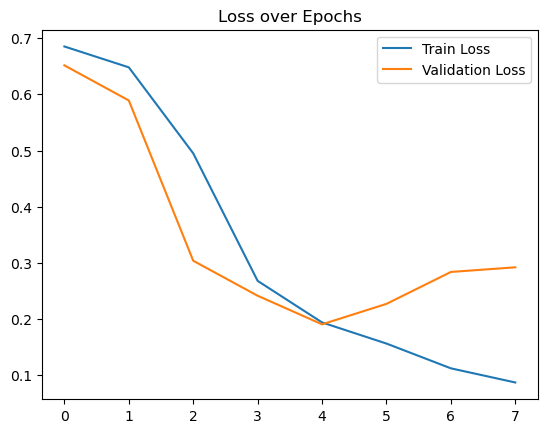

In [12]:
# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

### Evaluate the Model on Test Data

In [13]:
loss, accuracy = model.evaluate(test_data)
print(f'Test Accuracy: {accuracy*100:.2f}%')

20/20 [==============================] - 13s 637ms/step - loss: 0.2768 - accuracy: 0.9345
Test Accuracy: 93.45%


Checking how good the model is when it sees unseen data (test set).

### Save the Model

In [14]:
model.save('malaria_detector_model.h5')

c:\Users\Randell\anaconda3\envs\EDA\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
